In [1]:
pip install transformers torch torchvision PIL matplotlib

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement PIL (from versions: none)
ERROR: No matching distribution found for PIL


In [2]:
import os
import torch
from PIL import Image
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
import matplotlib.pyplot as plt
from transformers import ViltProcessor, ViltForImagesAndTextClassification

In [31]:
from transformers import VisionEncoderDecoderModel, ViTImageProcessor, BertTokenizer

In [33]:
import random

In [5]:
# Load pre-trained model and processor
feature_extractor = ViTImageProcessor.from_pretrained("atasoglu/vit-bert-flickr8k")
tokenizer = BertTokenizer.from_pretrained("atasoglu/vit-bert-flickr8k")
model = VisionEncoderDecoderModel.from_pretrained("atasoglu/vit-bert-flickr8k")

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

VisionEncoderDecoderModel(
  (encoder): ViTModel(
    (embeddings): ViTEmbeddings(
      (patch_embeddings): ViTPatchEmbeddings(
        (projection): Conv2d(3, 768, kernel_size=(16, 16), stride=(16, 16))
      )
      (dropout): Dropout(p=0.0, inplace=False)
    )
    (encoder): ViTEncoder(
      (layer): ModuleList(
        (0-11): 12 x ViTLayer(
          (attention): ViTAttention(
            (attention): ViTSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.0, inplace=False)
            )
            (output): ViTSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.0, inplace=False)
            )
          )
          (intermediate): ViTIntermediate(
            (dense): Linear(in_featur

In [27]:
# Load image captioning dataset
def load_captions(captions_file):
    image_captions = {}
    with open(captions_file, 'r') as file:
        for line in file:
            parts = line.strip().split('#', 2)
            if len(parts) != 3:
                continue
            img_id, _, caption = parts
            if img_id not in image_captions:
                image_captions[img_id] = []
            image_captions[img_id].append(caption)
    return image_captions

# Function to generate caption for a single image
def generate_caption(image_path):
    img = Image.open(image_path)
    pixel_values = feature_extractor(images=[img], return_tensors="pt").pixel_values
    pixel_values = pixel_values.to(device)
    
    output_ids = model.generate(pixel_values)
    preds = tokenizer.batch_decode(output_ids, skip_special_tokens=True)
    return preds[0]


# Display images with captions in a single row
def display_images_with_captions(image_paths, captions):
    plt.figure(figsize=(24, 6))  # Adjusted width to fit images and captions
    for i, (image_path, caption) in enumerate(zip(image_paths, captions)):
        img = Image.open(image_path)
        plt.subplot(1, 5, i + 1)  # 1 row, 5 columns
        plt.imshow(img)
        plt.axis('off')
        plt.title(caption, fontsize=10, wrap=True)
    plt.tight_layout(pad=3.0)  # Adjust padding between subplots
    plt.show()
    
# Path to your dataset
image_folder = r'C:\Users\User\Workbooks\Dissertation\Flickr8k_Dataset\Flicker8k_Dataset'
captions_file = r'C:\Users\User\Workbooks\Dissertation\Flickr8k_text\Flickr8k.token.txt'


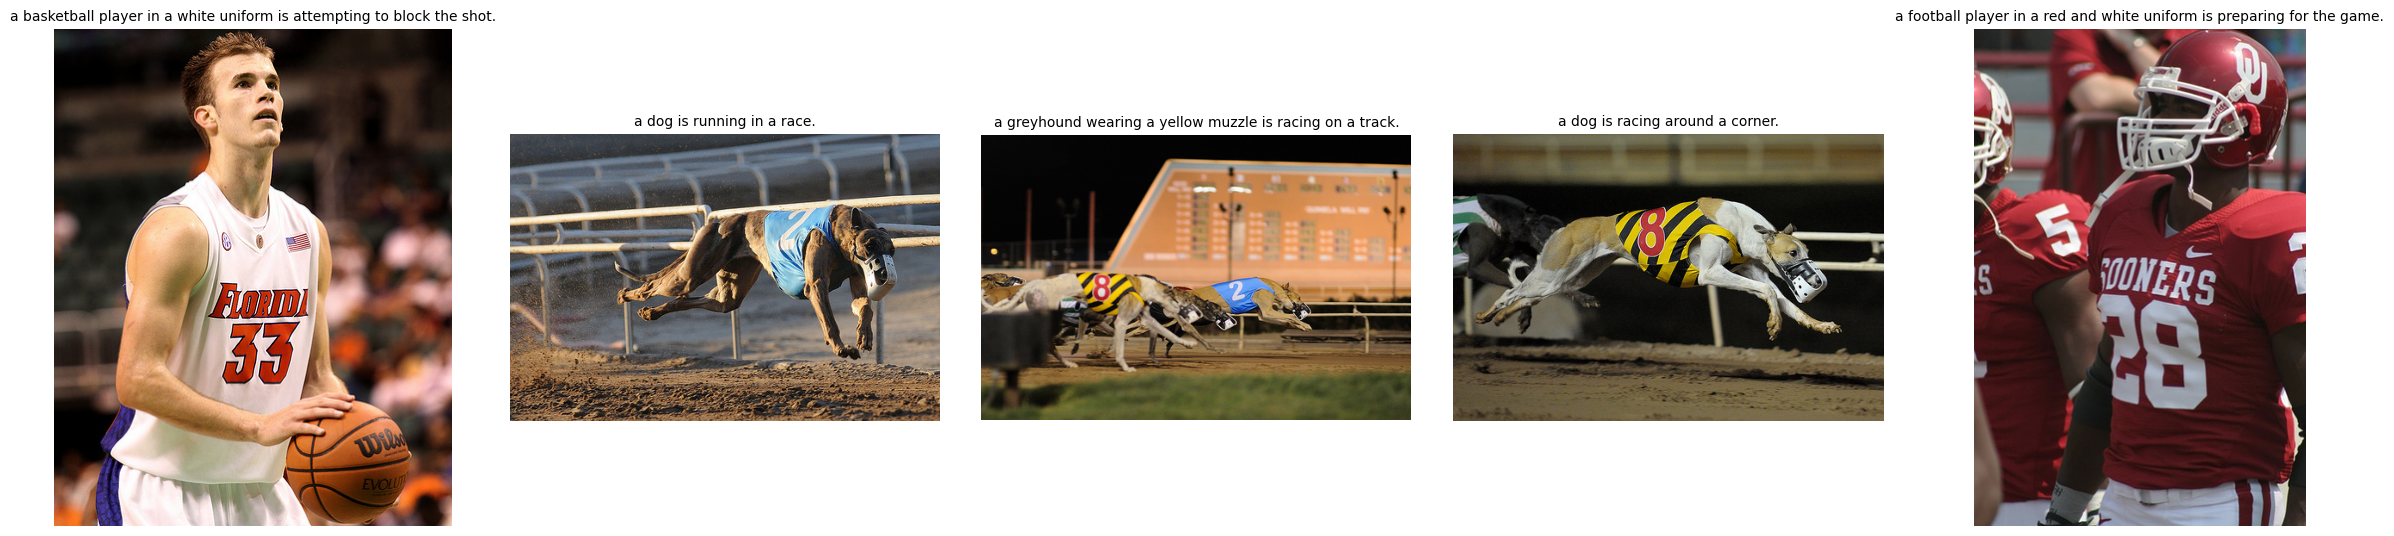

In [43]:
# Load captions
image_captions = load_captions(captions_file)

# Ensure different images are shown each time
def get_random_images(image_captions, num_images=5):
    image_files = list(image_captions.keys())
    if len(image_files) < num_images:
        raise ValueError("Not enough images in the dataset to select the requested number.")
    return random.sample(image_files, num_images)

# Select 5 random images
random_image_files = get_random_images(image_captions)

# Generate captions for the selected images
image_paths = [os.path.join(image_folder, img_file) for img_file in random_image_files]
captions = [generate_caption(image_path) for image_path in image_paths]

# Display the images and their generated captions in a single row
display_images_with_captions(image_paths, captions)

In [42]:
# Display image with caption (Single Image)
def display_image_with_caption(image_path, caption):
    img = Image.open(image_path)
    plt.figure(figsize=(8, 6))
    plt.imshow(img)
    plt.axis('off')
    plt.title(caption)
    plt.show()

Generated caption: a man in a blue shirt is standing next to a building.


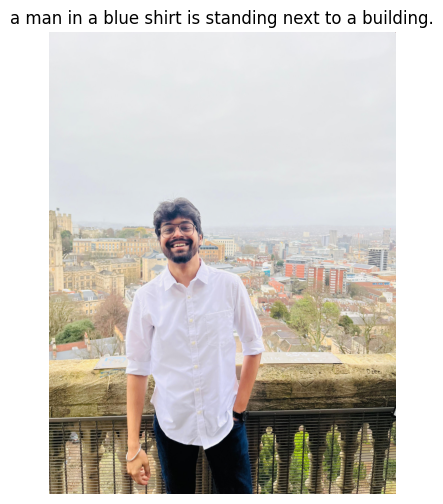

True captions for IMG-20231219-WA0018.jpg:


In [30]:
# Example usage: Generate caption for an image Manually
#example_image = r'C:\Users\User\Workbooks\Dissertation\Flickr8k_Dataset\Flicker8k_Dataset\808245064_8a7971fc5b.jpg'
example_image = r'C:\Users\User\Downloads\Phone Link\IMG-20231219-WA0018.jpg'
generated_caption = generate_caption(example_image)
print(f'Generated caption: {generated_caption}')
display_image_with_caption(example_image, generated_caption)

# Optionally, print true captions
image_id = os.path.basename(example_image)
print(f'True captions for {image_id}:')
for caption in image_captions.get(image_id, []):
    print(f' - {caption}')